In [1]:
%matplotlib inline

import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as ml
import pandas
import random
import seaborn

matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
seaborn.set_context({"figure.figsize": (12, 8)})

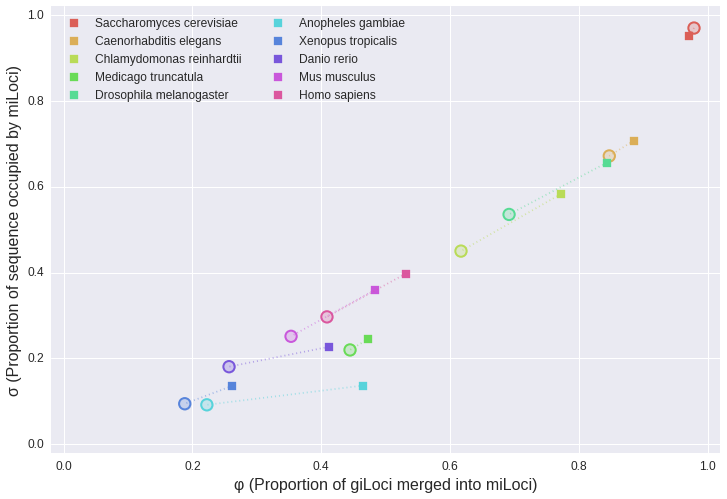

In [2]:
data = pandas.read_table('phisigma-modorg-centroids.tsv')
sdata = pandas.read_table('phisigma-modorg-shuffled-centroids.tsv')
speciesnames = ['Saccharomyces cerevisiae', 'Caenorhabditis elegans',
                'Chlamydomonas reinhardtii', 'Medicago truncatula',
                'Drosophila melanogaster', 'Anopheles gambiae',
                'Xenopus tropicalis', 'Danio rerio',
                'Mus musculus', 'Homo sapiens']
specieslist = ['Scer', 'Cele', 'Crei', 'Mtru', 'Dmel',
               'Agam', 'Xtro', 'Drer', 'Mmus', 'Hsap']

plots = list()
palette = seaborn.color_palette("hls", len(specieslist))
for i, species in enumerate(specieslist):
    phis = list()
    sigmas = list()
        
    specdata = data.loc[(data.Species == species)]
    phis.append(list(specdata['Phi'])[0])
    sigmas.append(list(specdata['Sigma'])[0])
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i], marker='s', s=64)
    plots.append(plot)

    specdata = sdata.loc[(sdata.Species == species)]
    phis.append(list(specdata['Phi'])[0])
    sigmas.append(list(specdata['Sigma'])[0])
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i], s=128, alpha=0.25)
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i], s=128, facecolor='none', lw='2')
    #plots.append(plot)
    plot = plt.plot(phis, sigmas, color=palette[i], alpha=0.5, ls=':')
    
_ = plt.xlim(-0.02, 1.02)
_ = plt.ylim(-0.02, 1.02)
_ = plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
_ = plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
_ = plt.legend(plots, speciesnames, scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=12)
_ = plt.show()